<a href="https://colab.research.google.com/github/Saxon-account/Saxon-account/blob/main/road_network_analysis_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a Road Network Graph Using `osmnx`
In this coding challenge, we are going to work with road network data from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84) using the [osmnx](https://osmnx.readthedocs.io/en/stable/index.html) python package.

*You need to answer ALL question prompts in this notebook. Question prompts are all italicized.*



### 1. Install the `osmnx` Library

Before you begin, ensure that the `osmnx` library is installed. You can do this by running the following command:




```
!pip install osmnx
```



In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 780.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### 2. Import the Required Libraries
Next, you will need to import the necessary libraries in your Python code, and check the version.

In [2]:
import osmnx as ox
ox.__version__

'1.9.4'

### 3. Generate the Graph for a Specific Location

Now, you will generate a road network graph from a specific address.

In this example, we will use the school address: "13051 Whittington Drive, Houston, TX" and generate a graph of roads within a 5,000-meter radius (5 km). We will use the `ox.graph.graph_from_address()` method. (See documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html)

* `address`: This is the starting location around which the graph will be generated. You can replace this address with any other address.
* `dist`: This specifies the radius (in meters) around the address for which the network will be created. In this case, the radius is 5,000 meters (or 5 km).
* `network_type`: This specifies the type of network you want to extract. Options include:
  * "drive": For driving (car) routes.
  * "walk": For pedestrian routes.
  * "bike": For cycling routes.
  * "all": For all types of routes.

In [3]:
# Add code in the blanks
G = ox.graph_from_address(
    address="13051 Whittington Drive, Houston, TX",
    dist=5000,
    network_type="drive")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### 4. Visualize the graph
We will use the `ox.project_graph()` and `ox.plot_graph()` methods to visualize the graph.

*4.1 Modify the `node_size` parameter. How does it change the visualisation?*

The nodes become much larger and easier to see on the visualized graph

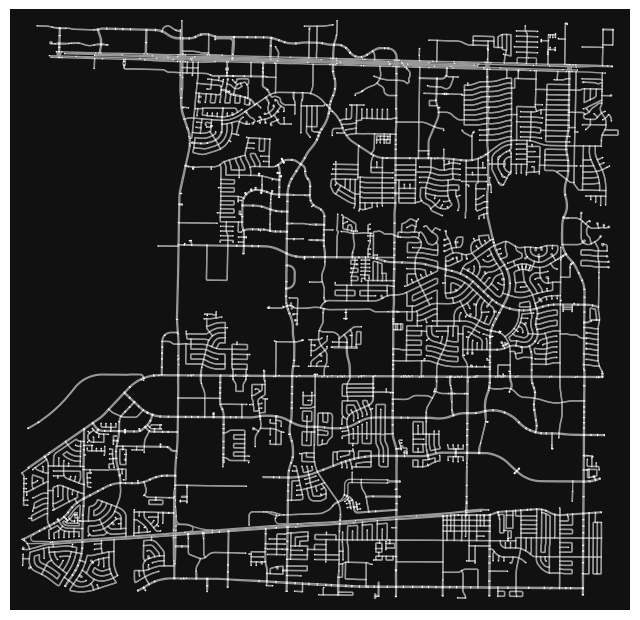

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=1)

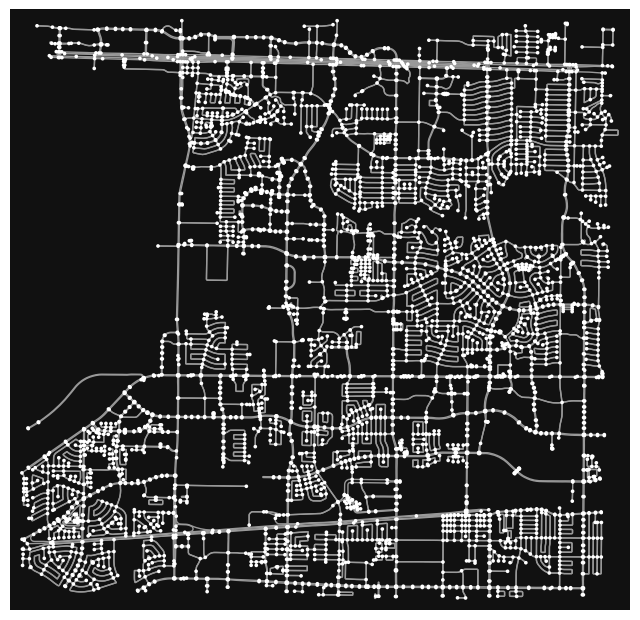

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=7)

### 5. Analyze the graph

*5.1 How many nodes are in the graph? [Use: `G.nodes()`]*

4600 nodes

In [6]:
nodes_list = list(G.nodes())
print(len(nodes_list))

4598


*5.2 How many edges are in the graph? [Use: `G.edges`]*

10257 edges

In [7]:
edges_list = list(G.edges())
print(len(edges_list))

10255


*5.3 What information does the node store? Run the code below to get the information for the first node in the graph.*

In [8]:
current_node = nodes_list[0]
print(f"Node {current_node}: {G.nodes[current_node]}")

Node 151365266: {'y': 29.749123, 'x': -95.5721842, 'street_count': 3}


*5.4 What information does the edge store? Is the edge weight part of this information?*

y coordinates, x coordinates, and street count. There is no information on the edge weight

*5.5 Create a new graph, `G_walk` by specifying `network_type` to "walk". Visualize it and compare it with the road network. How many nodes and edges does `G_walk` contain?*

20109 nodes
57406 edges

In [9]:
G_walk = ox.graph_from_address(
    address="13051 Whittington Drive, Houston, TX",
    dist=5000,
    network_type="walk")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


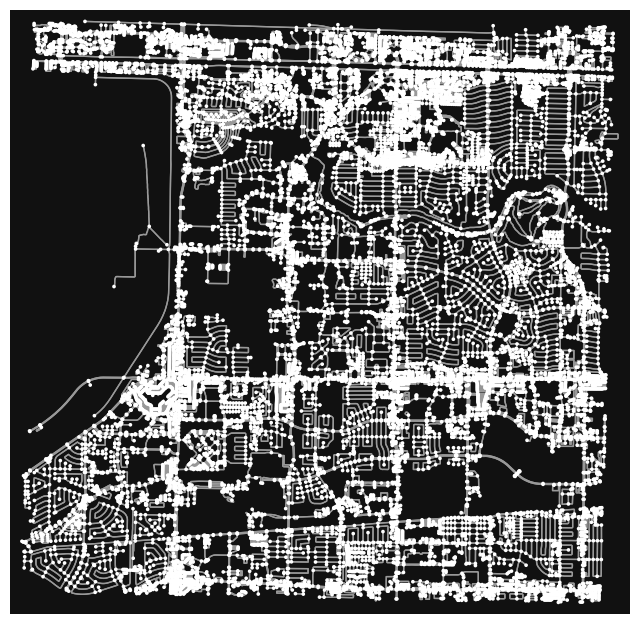

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
Gp = ox.project_graph(G_walk)
ox.plot_graph(Gp, node_size=7)

In [11]:
nodes_list = list(G_walk.nodes)
print(len(nodes_list))
nodes_list = list(G_walk.edges)
print(len(nodes_list))

20178
57602


# Shortest Path using `osmnx`

To find the shortest path, we will use the `shortest_path` method.

### 6. Setup Origin and Destination Nodes
But first, we need to specify the origin and destination using the latitude and longitude values for the location.



 Use google maps, to find the lat-long values of:
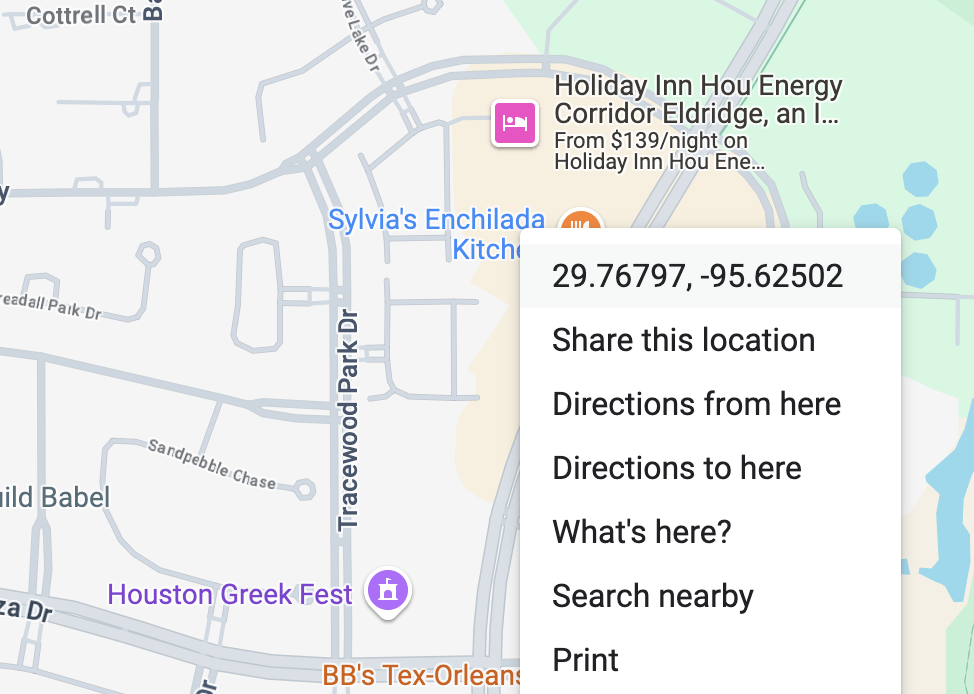
* origin - Village High School
* destination -  Sylvia's Enchilada Kitchen

*6.1 Specify the latitude & longitude as tuple.*

In [12]:
origin = (29.745832702425822, -95.61919281714873) # Point A
destination = (29.772202824267573, -95.62506523803509) # Point B

*6.2 Next use the `nearest_nodes()` method to get the node in the graph that is nearest to the specified location. Note that `x` is longitude and `y` is latitude.*

In [13]:
origin_node = ox.distance.nearest_nodes(G_walk, X=origin[1], Y=-origin[0])
destination_node = ox.distance.nearest_nodes(G_walk, X=destination[1], Y=destination[0])

### 7. Find shortest path using `osmnx` `shortest_path()` method
Now we are ready to find the shortest path between the origin and destination using the shortest_path method.

In [14]:
route = ox.shortest_path(G_walk, origin_node, destination_node)

Visualise the shortest path using `plot_graph_route()` method.

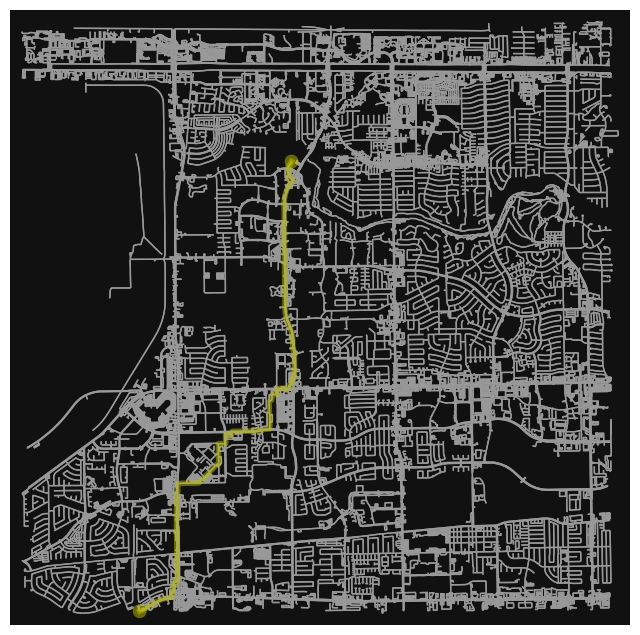

In [15]:
fig, ax = ox.plot_graph_route(G_walk, route, route_color="y", node_size=0)

# Shortest Path using your Dijkstra's method



*8.1 Use the `GraphL` class that you have already created in a previous lesson in this notebook. Note that `GraphL` class should have dijkstra_shortest_path() as a method.*

In [16]:
import numpy as np
import math as math

class GraphL:
  def __init__(self, directed=False):
    self.aList = {}
    self.directed = directed

  def add_edge(self, u, v, weight):
      if u not in self.aList:
            self.aList[u] = []
      self.aList[u].append((v, weight))

        # If the graph is undirected, add the reverse edge
      if not self.directed:
          if v not in self.aList:
              self.aList[v] = []
          self.aList[v].append((u, weight))

  def remove_edge(self, u, tup): #tup is the tuple being received
      self.aList[u].remove(tup)
      if not(self.directed):
        self.aList[tup[0]].remove((u,tup[1]))

  def display(self):
      print(self.aList)

  def get_neighbors(self, u):
      return self.aList.get(u, [])

  def has_edge(self, u, v):
      i = int(len(self.aList[u])/2-1) #length of all values including tuples (divide by 2) minus 1 (index)
      while i <= 0:
        if self.aList[u][i][0] == v:
          return "Has an edge"
        i = i-1
      return "Doesn't have edge"

  def add_node(self, neighbors):
      self.aList[len(self.aList)] = neighbors

  def get_weight(self, u, v):
      for neighbor, weight in self.get_neighbors(u):
            if neighbor == v:
                return weight
      return None

  def dijkstras_shortest_path(self, start, end): #finding the shortest path with weighted edges
      counter = 0
      dist = {}
      prev = {}
      marked = {}
      for key in self.aList:
        dist[key] = float('inf')
        prev[key] = None
        marked[key] = False

      # dist = [float('inf')] * len(self.aList)
      # prev = [None] * len(self.aList)
      s = start
      e = end

      if s in self.aList and e in self.aList:
        queue = {start : start}
        dist[start] = 0
        prev[start] = start

        while queue:

          short = next(iter(queue.values())) #Next value in queue

          for i in queue: #len(self.aList)
              if dist[i] < dist[short]:
                short = queue[i]
          start = queue.pop(short)

          if not marked[start]:
            marked[start] = True
            for neighbor, weight in self.get_neighbors(start):
                if marked[neighbor]:
                    continue
                new_dist = (dist[start] + self.get_weight(start, neighbor)) + weight

                # If we found a shorter path to the neighbor
                if new_dist < dist[neighbor]:
                    dist[neighbor] = new_dist
                    prev[neighbor] = start
                    queue[neighbor] = neighbor
                    counter = counter +1

        print("Distance to end:",dist[end])
        print("Dijkstras number of nodes considered: ", counter)

        fastPath = []
        fastPath.append(e)
        while not(fastPath[-1]==s):
           fastPath.append(prev[e])
           e = prev[e]

        fastPath.reverse()
        pathLen = len(fastPath)-1
        print("Fastest path:", fastPath)
        return fastPath
      else:
        print("Node not in graph")
        return None

  def haversine_distance(self, lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in meters
    distance = R * c * 1000

    return distance

  def a_star(self, start, end, lat_lon): #finding the shortest path with weighted edges
      counter = 0
      prev = {}
      marked = {}
      g_cost = {}
      f_cost = {}
      for key in self.aList:
        prev[key] = None
        marked[key] = False
        g_cost[key] = float('inf')
        f_cost[key] = float('inf')

      s = start
      e = end

      g_cost[start] = 0
      f_cost[start] = self.haversine_distance(lat_lon[start][0], lat_lon[start][1], lat_lon[end][0], lat_lon[end][1])

      if s in self.aList and e in self.aList:
        queue = {start : start}
        prev[start] = start

        while queue:

          short = next(iter(queue.values())) #Next value in queue

          for i in queue: #len(self.aList)
              if f_cost[i] < f_cost[short]:
                short = queue[i]
          start = queue.pop(short)

          if not marked[start]:
            marked[start] = True
            for neighbor, weight in self.get_neighbors(start):
                if marked[neighbor]:
                    continue

                tentative_g = g_cost[start] + weight

                # If we found a shorter path to the neighbor
                if tentative_g < g_cost[neighbor]:
                    queue[neighbor] = (neighbor)
                    counter = counter+1
                    prev[neighbor] = start
                    g_cost[neighbor] = tentative_g

                    # f(n) = g(n) + h(n)
                    h = self.haversine_distance(lat_lon[neighbor][0], lat_lon[neighbor][1], lat_lon[e][0], lat_lon[e][1])
                    f_cost[neighbor] = g_cost[neighbor] + h

        fastPath = []
        fastPath.append(e)
        while not(fastPath[-1]==s):
           fastPath.append(prev[e])
           e = prev[e]

        fastPath.reverse()
        pathLen = len(fastPath)-1
        print("Fastest path:", fastPath)
        print("A-star number of nodes considered: ", counter)
        return fastPath
      else:
        print("Node not in graph")
        return None

*8.2 Now we will copy the nodes from the `osmnx` graph to our adjacency list graph representation.*

In [17]:
myG = GraphL(directed=True)

neighborList= []
for node in G_walk.nodes():
    # add node using your add_node() method
    for neighbor, data in G_walk[node].items():
        for edge_data in data.values():
            weight = edge_data.get('length', 1)  # Assuming 'length' is the edge attribute
            myG.add_edge(node, neighbor, weight) #myG.add_edge(node, neighbor, weight) # add edge using your add_edge() method
            neighborList.append((neighbor, weight))
    myG.add_node(neighborList)


*8.3 Display the graph using the display() method in the `GraphL` class.*

In [18]:
#myG.display()

* Get the shortest path by calling `dijkstra_shortest_path()` method with the newly created `myG` graph.

* Plot the path and compare it with the output of the `shortest_path()` from the `osmnx` package.

*8.4 Compare the results.Does your implementation give the same route as that of the `osmnx` package?*

In [19]:
G_walk = ox.graph_from_address(
    address="13051 Whittington Drive, Houston, TX",
    dist=5000,
    network_type="walk")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


In [20]:
origin = (29.745832702425822, -95.61919281714873) # Point A
destination = (29.772202824267573, -95.62506523803509) # Point B
origin_node = ox.distance.nearest_nodes(G_walk, X=origin[1], Y=-origin[0])
destination_node = ox.distance.nearest_nodes(G_walk, X=destination[1], Y=destination[0])

# Initialize your graph
myG = GraphL(directed=True)


for node in G_walk.nodes():
    neighborList = []  # Reset neighborList for each node

    # Iterate over the neighbors of the current node
    for neighbor, data in G_walk[node].items():
        for edge_data in data.values():
            # Get the weight (distance/length) of the edge
            weight = edge_data.get('length', 1)  # Default to 1 if no 'length' attribute
            myG.add_edge(node, neighbor, weight)
            neighborList.append((neighbor, weight))

Distance to end: 19772.16000000001
Dijkstras number of nodes considered:  23499
Fastest path: [7377515818, 2700744513, 7377515842, 600972995, 151937912, 151542170, 152555034, 9910816938, 151542060, 153176447, 151918547, 7641865947, 7641865956, 151777455, 151937921, 6820595160, 11720273927, 152481390, 4735211985, 11720273922, 4194103193, 8396298834, 151512697, 4194095900, 601019325, 151478936, 4194095938, 4194095931, 151899731, 153195849, 153195852, 153195854, 151478806, 152127566, 5235926147, 152127584, 5235926150, 2400281279, 152127519, 151408375, 151408393, 152027419, 8075955590, 12141114590, 2399940718, 151943296, 2418431957, 152400171, 2057800614, 2058019847, 2058019778, 2058019670, 3982178060, 3982178111, 2058019537, 2058019583, 2058019624, 2058019523, 2058019726, 2057800801, 2057800580, 2057800777, 2057800723, 2057800713, 2057800809, 2057800727, 2057800679, 2057800700, 5080119486, 2057800510, 2057800470, 2057800712, 2057800634, 4710739623, 5739647249, 5739647251, 3704795337, 3704

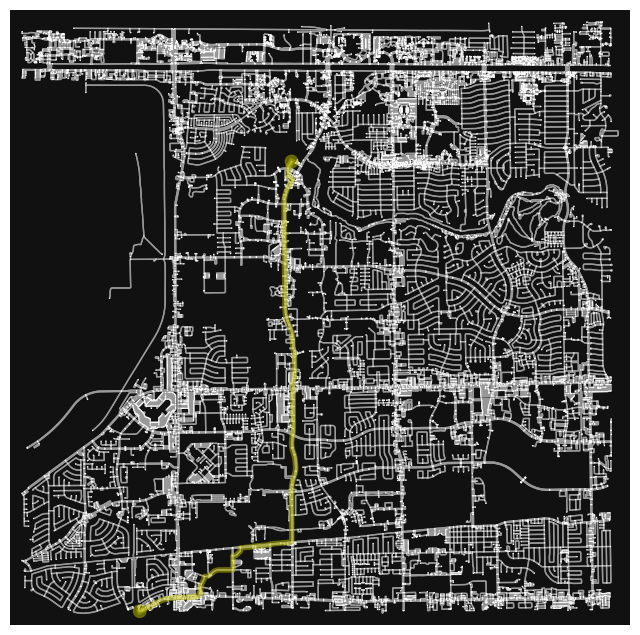

In [21]:
routeList = myG.dijkstras_shortest_path(origin_node, destination_node)
fig, ax = ox.plot_graph_route(G_walk, routeList, route_color="y", node_size=1)

# Your Turn
*9. Modify the graph to include a 20 km radius around an address of your choice. Choose at least 2 (origin, destination) pairs and compute shortest path using your Dijkstra's method. Visualize the results.*

In [22]:
G_Address2 = ox.graph_from_address(
    address="11940 Westheimer Rd, Houston, TX",
    dist=10000,
    network_type="walk")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


In [23]:
myG = GraphL(directed=True)

In [24]:
origin1 = (29.737554, -95.582247)
destination1 = (29.746957, -95.600133)

origin2 = (29.750021, -95.584822)
destination2 = (29.728916, -95.603545)



In [25]:
origin_node1 = ox.distance.nearest_nodes(G_Address2, X=origin1[1], Y=-origin1[0])
destination_node1 = ox.distance.nearest_nodes(G_Address2, X=destination1[1], Y=destination1[0])

for node in G_Address2.nodes():
    neighborList = []  # Reset neighborList for each node

    # Iterate over the neighbors of the current node
    for neighbor, data in G_Address2[node].items():
        for edge_data in data.values():
            # Get the weight (distance/length) of the edge
            weight = edge_data.get('length', 1)  # Default to 1 if no 'length' attribute
            myG.add_edge(node, neighbor, weight)
            neighborList.append((neighbor, weight))

Distance to end: 24988.786000000007
Dijkstras number of nodes considered:  82248
Fastest path: [5843326314, 2055924304, 2896428665, 5843326304, 10973861651, 2402992664, 2402992674, 10963654264, 7590923902, 9929030224, 2055924246, 2037790670, 9785231630, 6822140880, 2037790671, 2037790673, 2037790674, 2037790675, 2037790676, 4230975031, 2055924096, 2037790677, 7069782331, 7069782333, 2037790679, 2037790680, 2037790682, 2037790684, 2037790685, 2037790687, 2037790688, 152621623, 152621620, 152041426, 151900006, 151643244, 152185762, 152593977, 7584418896, 7584418893, 152621616, 151834683, 151996127, 152621606, 151834587, 152621598, 151980444, 151813293, 151980429, 2408715802, 4306306590, 152621587, 151790510, 2056628850, 152095506, 151721635, 2037790728, 152621582, 8153498482, 8153498486, 152512445, 152621569, 152621555, 151673406, 152149994, 2057694002, 152621553, 5819960161, 5582079163, 2383148277, 8310860799, 2383145008, 2383145011, 3228332137, 152360869, 152621545, 3228332320, 1526215

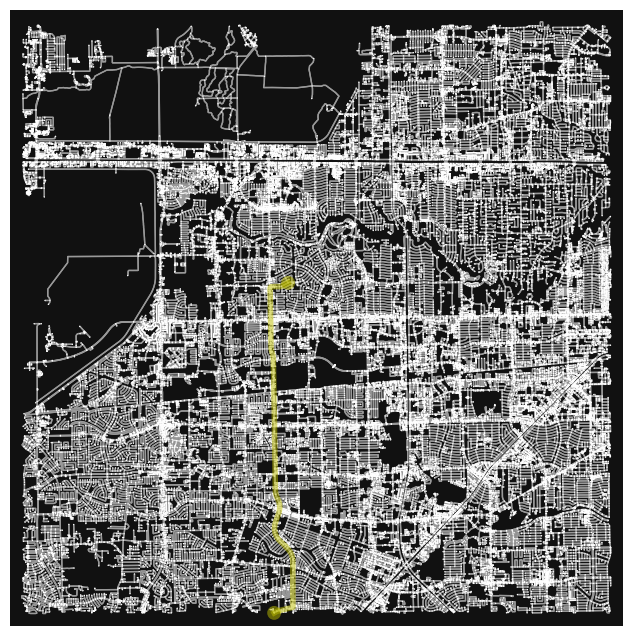

In [26]:
routeList = myG.dijkstras_shortest_path(origin_node1, destination_node1)
fig, ax = ox.plot_graph_route(G_Address2, routeList, route_color="y", node_size=1)

In [27]:
origin_node2 = ox.distance.nearest_nodes(G_Address2, X=origin2[1], Y=-origin2[0])
destination_node2 = ox.distance.nearest_nodes(G_Address2, X=destination2[1], Y=destination2[0])

for node in G_Address2.nodes():
    neighborList = []  # Reset neighborList for each node

    # Iterate over the neighbors of the current node
    for neighbor, data in G_Address2[node].items():
        for edge_data in data.values():
            # Get the weight (distance/length) of the edge
            weight = edge_data.get('length', 1)  # Default to 1 if no 'length' attribute
            myG.add_edge(node, neighbor, weight)
            neighborList.append((neighbor, weight))

Distance to end: 20260.568000000007
Dijkstras number of nodes considered:  82248
Fastest path: [5843326314, 2055924304, 2896428665, 5843326304, 10973861651, 2402992664, 2402992674, 10963654264, 7590923902, 9929030224, 2055924246, 2037790670, 9785231630, 6822140880, 2037790671, 2037790673, 2037790674, 2037790675, 2037790676, 4230975031, 2055924096, 2037790677, 7069782331, 7069782333, 2037790679, 2037790680, 2037790682, 2037790684, 2037790685, 2037790687, 2037790688, 152621623, 152621620, 152041426, 151900006, 151643244, 152185762, 152593977, 7584418896, 7584418893, 152621616, 151834683, 151996127, 152621606, 151834587, 152621598, 151980444, 151813293, 151980429, 2408715802, 4306306590, 152621587, 151790510, 2056628850, 152095506, 151721635, 2037790728, 152621582, 8153498482, 8153498486, 152512445, 152621569, 152621555, 151673406, 152149994, 2057694002, 152621553, 5819960161, 5582079163, 2383148277, 8310860799, 2383145008, 2383145011, 3228332137, 152360869, 152621545, 3228332320, 1526215

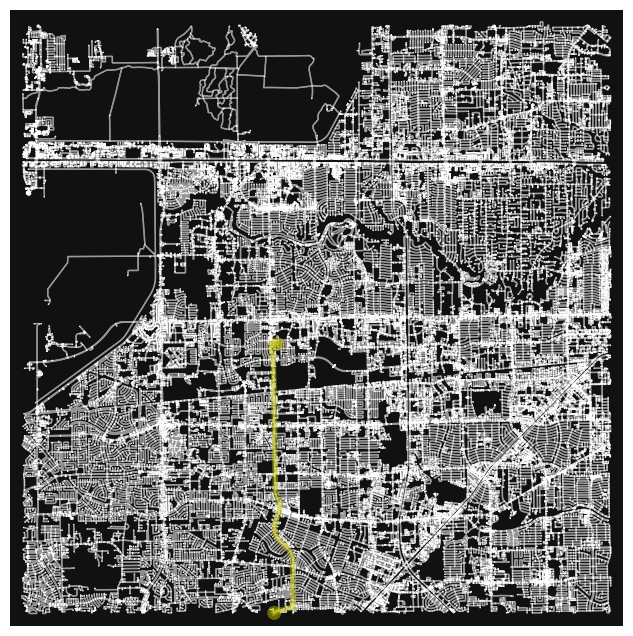

In [28]:
routeList = myG.dijkstras_shortest_path(origin_node2, destination_node2)
fig, ax = ox.plot_graph_route(G_Address2, routeList, route_color="y", node_size=1)

#A-star

In [29]:
AstarG = ox.graph_from_address(
    address="13051 Whittington Drive, Houston, TX",
    dist=5000,
    network_type="walk")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


In [30]:
origin = (29.745832702425822, -95.61919281714873) # Point A
destination = (29.772202824267573, -95.62506523803509) # Point B
origin_node = ox.distance.nearest_nodes(AstarG, X=origin[1], Y=-origin[0])
destination_node = ox.distance.nearest_nodes(AstarG, X=destination[1], Y=destination[0])

# Initialize your graph
myG = GraphL(directed=True)

# Dictionary to store the lat/lon for each node
lat_lon_dict = {}

# Iterate over nodes in AstarG
for node in AstarG.nodes():
    neighborList = []  # Reset neighborList for each node

    # Iterate over the neighbors of the current node
    for neighbor, data in AstarG[node].items():
        for edge_data in data.values():
            # Get the weight (distance/length) of the edge
            weight = edge_data.get('length', 1)  # Default to 1 if no 'length' attribute
            myG.add_edge(node, neighbor, weight)
            neighborList.append((neighbor, weight))

    # Store the latitude and longitude of the node
    lat_lon_dict[node] = (AstarG.nodes[node]['y'], AstarG.nodes[node]['x'])



Fastest path: [7377515818, 2700744513, 7377515842, 600972995, 600972973, 600972947, 151512730, 2700744516, 600972919, 600972902, 600972867, 8685198132, 600972795, 5813948840, 5813948850, 5813948841, 12174628576, 12174628574, 8528365490, 12174628565, 12174628566, 5813949956, 12174628581, 12174628579, 12174628577, 5813949957, 5813949955, 6822074593, 6822074596, 6822074597, 6822074598, 6822074599, 8302140525, 604705163, 604705162, 4195371862, 8321388456, 604705160, 6822725790, 8296296048, 6820562266, 6820562271, 6820562278, 6820562275, 2406937474, 604705158, 7839258264, 2700748300, 604705157, 4263536500, 4228527094, 4735211404, 4735211405, 4735211750, 153116711, 705718307, 4735211944, 151467321, 7588431899, 151771622, 151771618, 5868787784, 7588431936, 151748719, 151785788, 151748598, 151748603, 151748616, 6966068002, 151785759, 151937653, 5868789773, 2383307409, 151785743, 152279899, 5482881920, 5482881902, 5482881915, 5482881909, 9945126302, 9945126309, 9945126313, 9945126314, 994516592

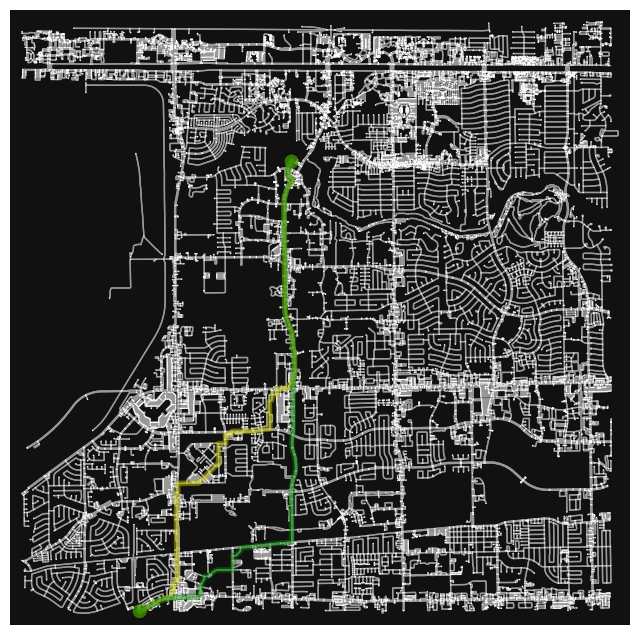

In [31]:
routeList1 = myG.a_star(origin_node, destination_node, lat_lon_dict), myG.dijkstras_shortest_path(origin_node, destination_node)
routeColors = "y","g"
fig, ax = ox.plot_graph_routes(AstarG, routeList1, routeColors, node_size=1)

